In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 1. Загрузка и подготовка данных (замените на ваш датасет)
# Пример с встроенным датасетом для демонстрации
df = pd.read_csv("C:/Users/swobo/processed_titanic.csv")
X = df.drop('VIP_True', axis=1)
y = df['VIP_True']

# Кодирование категориальных переменных если нужно
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размеры данных:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Размеры данных:
Обучающая выборка: (2993, 14)
Тестовая выборка: (1284, 14)


In [9]:
# 2. Случайный лес с OOB оценкой
print("\n" + "="*50)
print("СЛУЧАЙНЫЙ ЛЕС")
print("="*50)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    oob_score=True,
    random_state=42
)

rf_model.fit(X_train, y_train)

# OOB оценка
print(f"OOB Accuracy: {rf_model.oob_score_:.4f}")
print(f"OOB Error: {1 - rf_model.oob_score_:.4f}")

# Предсказания на тестовой выборке
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


СЛУЧАЙНЫЙ ЛЕС
OOB Accuracy: 0.9846
OOB Error: 0.0154
Test Accuracy: 0.9782

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1256
        True       0.00      0.00      0.00        28

    accuracy                           0.98      1284
   macro avg       0.49      0.50      0.49      1284
weighted avg       0.96      0.98      0.97      1284



In [10]:
# 3. AdaBoost
print("\n" + "="*50)
print("ADABOOST")
print("="*50)

ada_model = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)
y_pred_proba_ada = ada_model.predict_proba(X_test)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))


ADABOOST
Test Accuracy: 0.9743

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1256
        True       0.00      0.00      0.00        28

    accuracy                           0.97      1284
   macro avg       0.49      0.50      0.49      1284
weighted avg       0.96      0.97      0.97      1284



In [12]:
# 4. Градиентный бустинг
print("\n" + "="*50)
print("ГРАДИЕНТНЫЙ БУСТИНГ")
print("="*50)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


ГРАДИЕНТНЫЙ БУСТИНГ
Test Accuracy: 0.9673

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      1256
        True       0.00      0.00      0.00        28

    accuracy                           0.97      1284
   macro avg       0.49      0.49      0.49      1284
weighted avg       0.96      0.97      0.96      1284




СРАВНЕНИЕ МОДЕЛЕЙ И ROC-КРИВЫЕ
Random Forest AUC: 0.8537
AdaBoost AUC: 0.8628
Gradient Boosting AUC: 0.8397


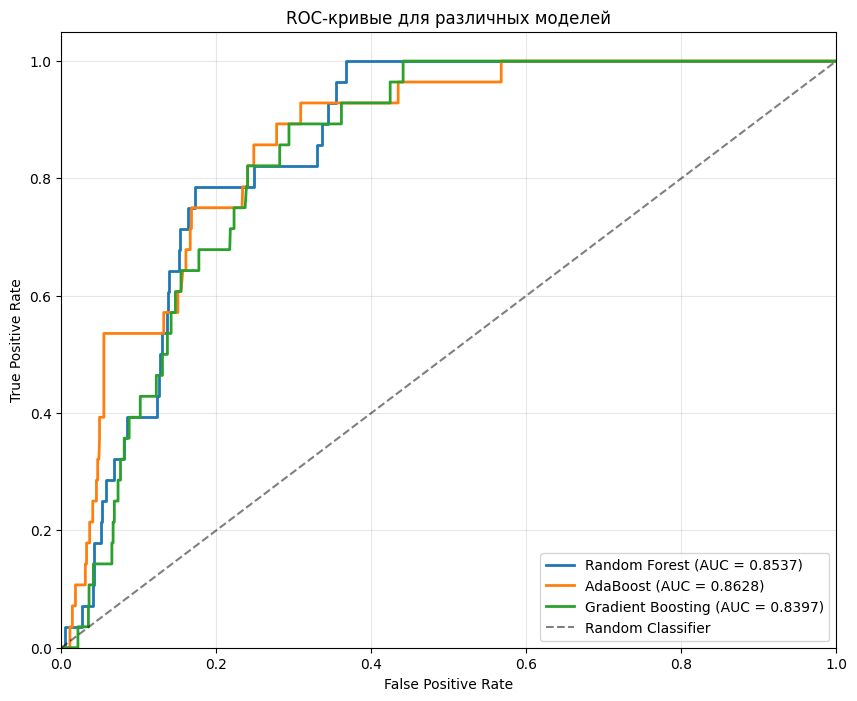


Сводная таблица результатов:
               Model  Test Accuracy     AUC  OOB Score
0      Random Forest         0.9782  0.8537     0.9846
1           AdaBoost         0.9743  0.8628        NaN
2  Gradient Boosting         0.9673  0.8397        NaN

Топ-10 самых важных признаков (Random Forest):
                    feature  importance
1                     Cabin    0.146089
8                      Name    0.143108
6                       Spa    0.113029
0               PassengerId    0.110063
7                    VRDeck    0.096722
4                 FoodCourt    0.091979
5              ShoppingMall    0.085563
2                       Age    0.085356
3               RoomService    0.083164
10  Destination_TRAPPIST-1e    0.015030


In [13]:
# 5. Сравнение моделей и ROC-кривые
print("\n" + "="*50)
print("СРАВНЕНИЕ МОДЕЛЕЙ И ROC-КРИВЫЕ")
print("="*50)

# Вычисление ROC кривых
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ada)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)

# Площадь под ROC кривой (AUC)
auc_rf = auc(fpr_rf, tpr_rf)
auc_ada = auc(fpr_ada, tpr_ada)
auc_gb = auc(fpr_gb, tpr_gb)

print(f"Random Forest AUC: {auc_rf:.4f}")
print(f"AdaBoost AUC: {auc_ada:.4f}")
print(f"Gradient Boosting AUC: {auc_gb:.4f}")

# Построение ROC-кривых
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', linewidth=2)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {auc_ada:.4f})', linewidth=2)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.4f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для различных моделей')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

# Сводная таблица результатов
results = pd.DataFrame({
    'Model': ['Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_gb)
    ],
    'AUC': [auc_rf, auc_ada, auc_gb],
    'OOB Score': [rf_model.oob_score_, np.nan, np.nan]
})

print("\nСводная таблица результатов:")
print(results.round(4))

# Важность признаков для Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nТоп-10 самых важных признаков (Random Forest):")
print(feature_importance.head(10))

# Сохранение результатов (для выгрузки на GitHub)
results.to_csv('model_results.csv', index=False)
feature_importance.to_csv('feature_importance.csv', index=False)